### K-Means clustering ไฟล์ที่กำหนดให้ชือ loyalty.csv ให้วิเคราะห์ข้อมูลโดยใช้ K-Means 
1. Plotting the data ดูการกระจายข้อมูล ให้นศ.พิจารณาว่า ข้อมูลใดควรเป็นแกน x และy
2. ทำ K-Means clustering ใช้ k=3
3. plot การจัดกลุ่ม
3. พิจารณาว่าค่าแบ่งข้อมูลเป็น 3 กลุ่ม เหมาะสมหรือไม่
4. แสดงจำนวนกลุ่มที่ดีที่สุดของข้อมูลชุดนี้

In [11]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('loyalty.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


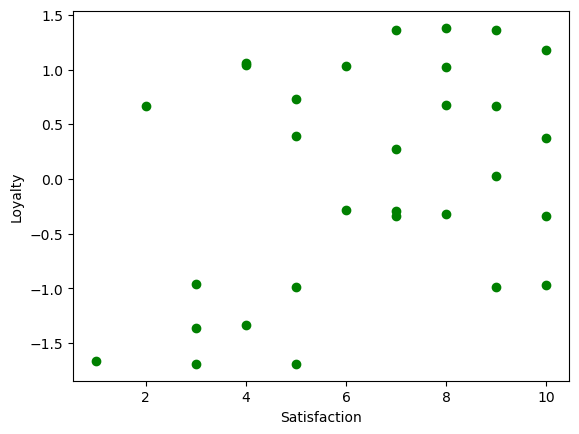

In [13]:
plt.scatter(data['Satisfaction'], data['Loyalty'],  c='green', marker="o") 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [14]:
k_means = KMeans(n_clusters=4)
k_means.fit(data)
cluster_pred = k_means.fit_predict(data)

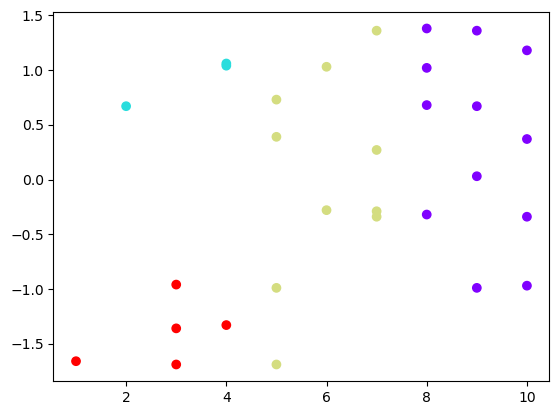

In [15]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=cluster_pred, cmap='rainbow', marker="o")

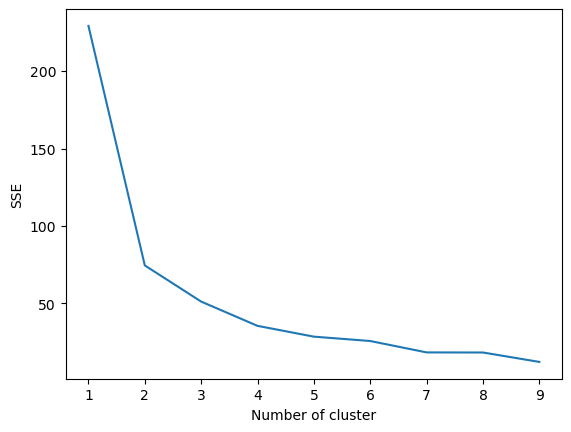

In [16]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [17]:
from sklearn import preprocessing
data_scale = preprocessing.scale(data)
print(data_scale)

[[-0.93138063 -1.3318111 ]
 [-0.15523011 -0.28117124]
 [-0.54330537 -0.99160391]
 [ 0.23284516 -0.29117733]
 [-0.93138063  1.05964534]
 [-2.09560642 -1.6620122 ]
 [ 1.39707095 -0.97159172]
 [ 0.62092042 -0.32119561]
 [ 0.62092042  1.01962097]
 [ 0.62092042  0.67941378]
 [ 1.39707095 -0.3412078 ]
 [-0.54330537  0.38923705]
 [-0.54330537 -1.69203048]
 [-1.70753116  0.66940768]
 [ 0.23284516  0.26916393]
 [ 1.00899568  1.35982816]
 [ 0.62092042  1.37984035]
 [ 0.23284516  1.35982816]
 [ 0.23284516 -0.3412078 ]
 [ 1.00899568  0.66940768]
 [ 1.39707095  1.17971847]
 [-1.31945589 -1.69203048]
 [-0.93138063  1.03963316]
 [-1.31945589 -0.96158562]
 [-0.15523011  1.02962706]
 [ 1.00899568 -0.99160391]
 [ 1.39707095  0.36922486]
 [ 1.00899568  0.02901767]
 [-1.31945589 -1.36182938]
 [-0.54330537  0.72944425]]


1 229.16347000000005
2 75.06580277777776
3 51.18796916666667
4 43.562019047619046
5 33.03709428571428
6 22.622678571428573
7 18.665864285714285
8 16.016755
9 11.358591666666667


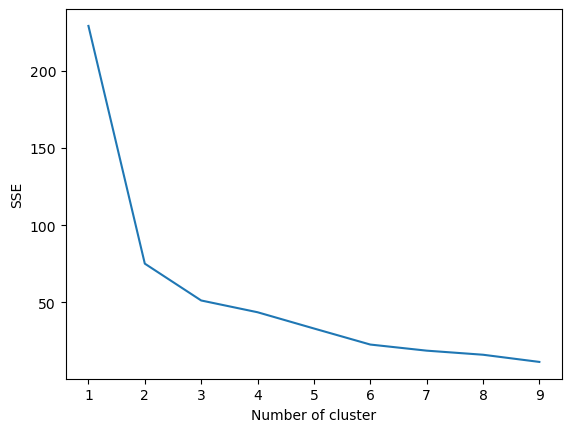

In [18]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

1 60.0
2 32.39512535905786
3 18.129659446063226
4 10.247181805928422
5 9.023976139083016
6 7.815010162046005
7 5.719678785599621
8 4.934766506103952
9 4.607969535400352


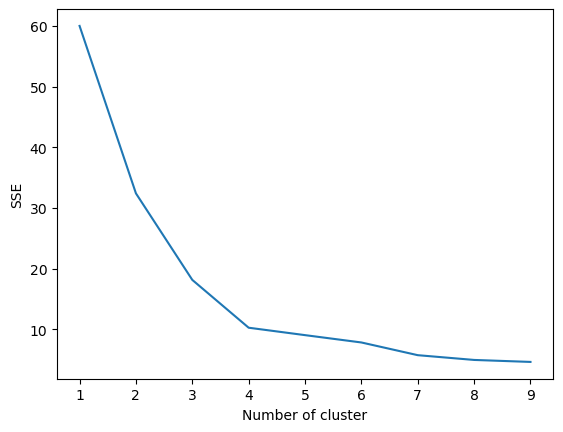

In [19]:


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scale)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(k,sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

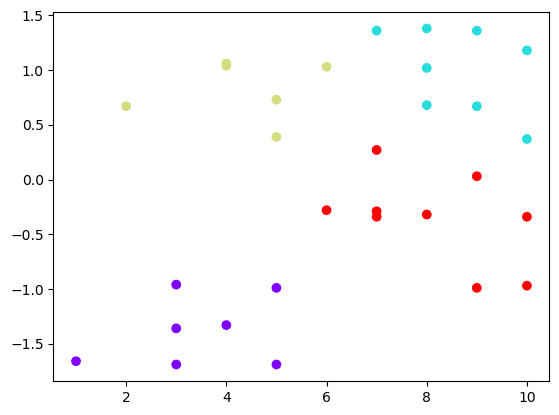

In [20]:
k_means = KMeans(n_clusters=4)
k_means.fit(data_scale)
cluster_scale_pred = k_means.fit_predict(data_scale)



plt.scatter(data['Satisfaction'], data['Loyalty'], c=cluster_scale_pred, cmap='rainbow', marker="o")